## How to Train YOLOv8 Object Detection on a Custom Dataset

In [ ]:
!nvidia-smi

In [ ]:
!pip install ultralytics

## Install YOLOv8

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

## Train YOLOv8 Model on Custom Dataset

In [ ]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="IR7LyRBBpSu5IQ9gF4mR")
project = rf.workspace().project("ewha_mi")
model = project.version(1).download("yolov8")

In [ ]:
# data.yaml 파일이 있는 경로 : 이 모델의 경우 '/content/'에 생성됨
# epoch은 정확도를 위해서 더 늘리는 방향으로 진행할 것
!yolo task=detect mode=train model=yolov8m.pt data={'/content/'}data.yaml epochs=20 imgsz=640

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/data.yaml, epochs=20, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=Non

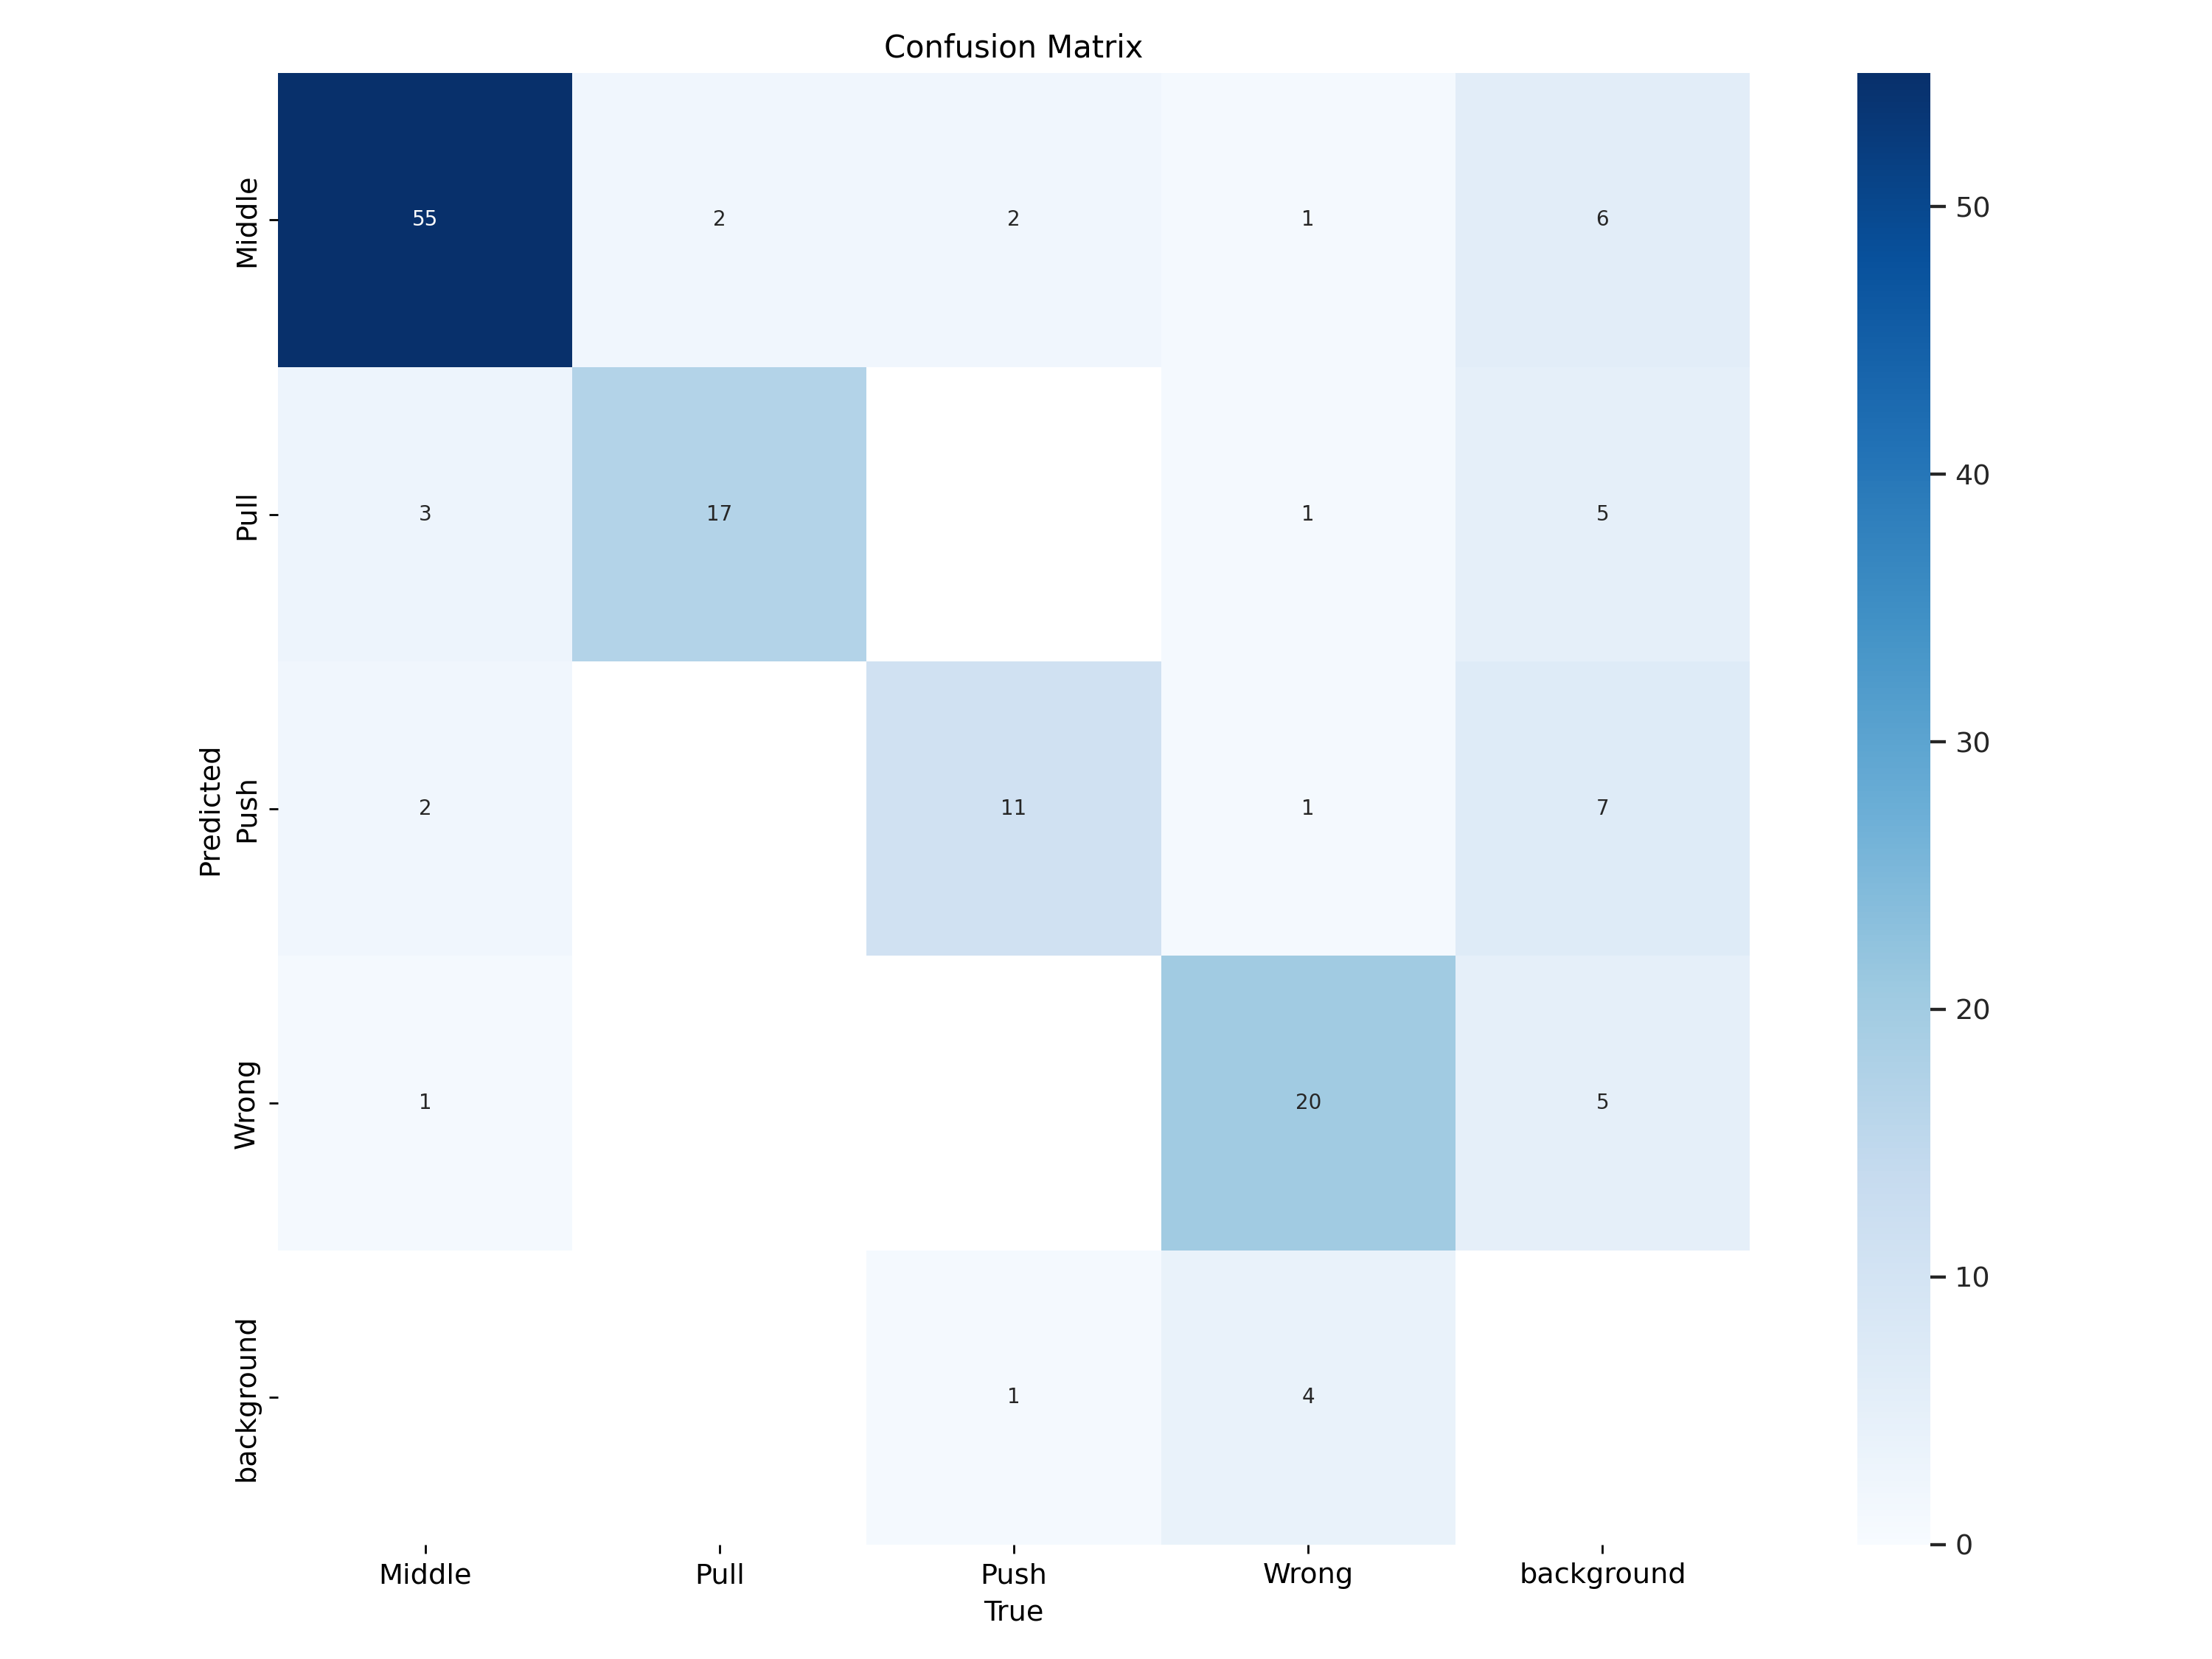

In [ ]:
# train 부분에 위에 학습 후 출력되는 Results saved to runs/detect/ 이후 train number에 따라 경로 수정
Image(filename=f'/content/runs/detect/train2/confusion_matrix.png', width=600)

In [ ]:
import torch
import os
from sklearn.metrics import precision_score, recall_score, f1_score

# YOLOv5 모델 불러오기
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

test_images_folder = '/content/ewha_mi-1/test/images'  # 이미지 폴더 경로
test_labels_folder = '/content/ewha_mi-1/test/labels'  # 라벨 폴더 경로

# 이미지와 라벨 파일 목록 가져오기
image_files = sorted(os.listdir(test_images_folder))
label_files = sorted(os.listdir(test_labels_folder))

model.eval()
true_labels = []
predicted_labels = []

# 이미지 파일과 라벨 파일을 하나씩 처리
for image_file, label_file in zip(image_files, label_files):
    image_path = os.path.join(test_images_folder, image_file)
    label_path = os.path.join(test_labels_folder, label_file)

    if os.path.isfile(image_path):  # 파일인 경우에만 처리
        try:
            # 이미지를 모델에 입력하여 예측
            results = model(image_path)  # 이미지로부터 객체 감지 실행
            predicted_class = results.pred[0][:, -1].tolist()  # 클래스 예측값 (마지막 열)

            # 라벨 파일 읽기 (라벨 처리에 따라 수정이 필요)
            with open(label_path, 'r') as label_file:
                true_label = label_file.read().strip()  # 파일에서 라벨 읽기
                true_label = int(true_label)  # 필요에 따라 타입 변환

            true_labels.append(true_label)
            predicted_labels.append(predicted_class)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")

# 정확도 계산
correct = sum(1 for pred, true in zip(predicted_labels, true_labels) if pred == true)
accuracy = correct / len(true_labels) if len(true_labels) > 0 else 0  # 0으로 나누는 경우 예외 처리

print(f"Accuracy: {accuracy:.4f}")


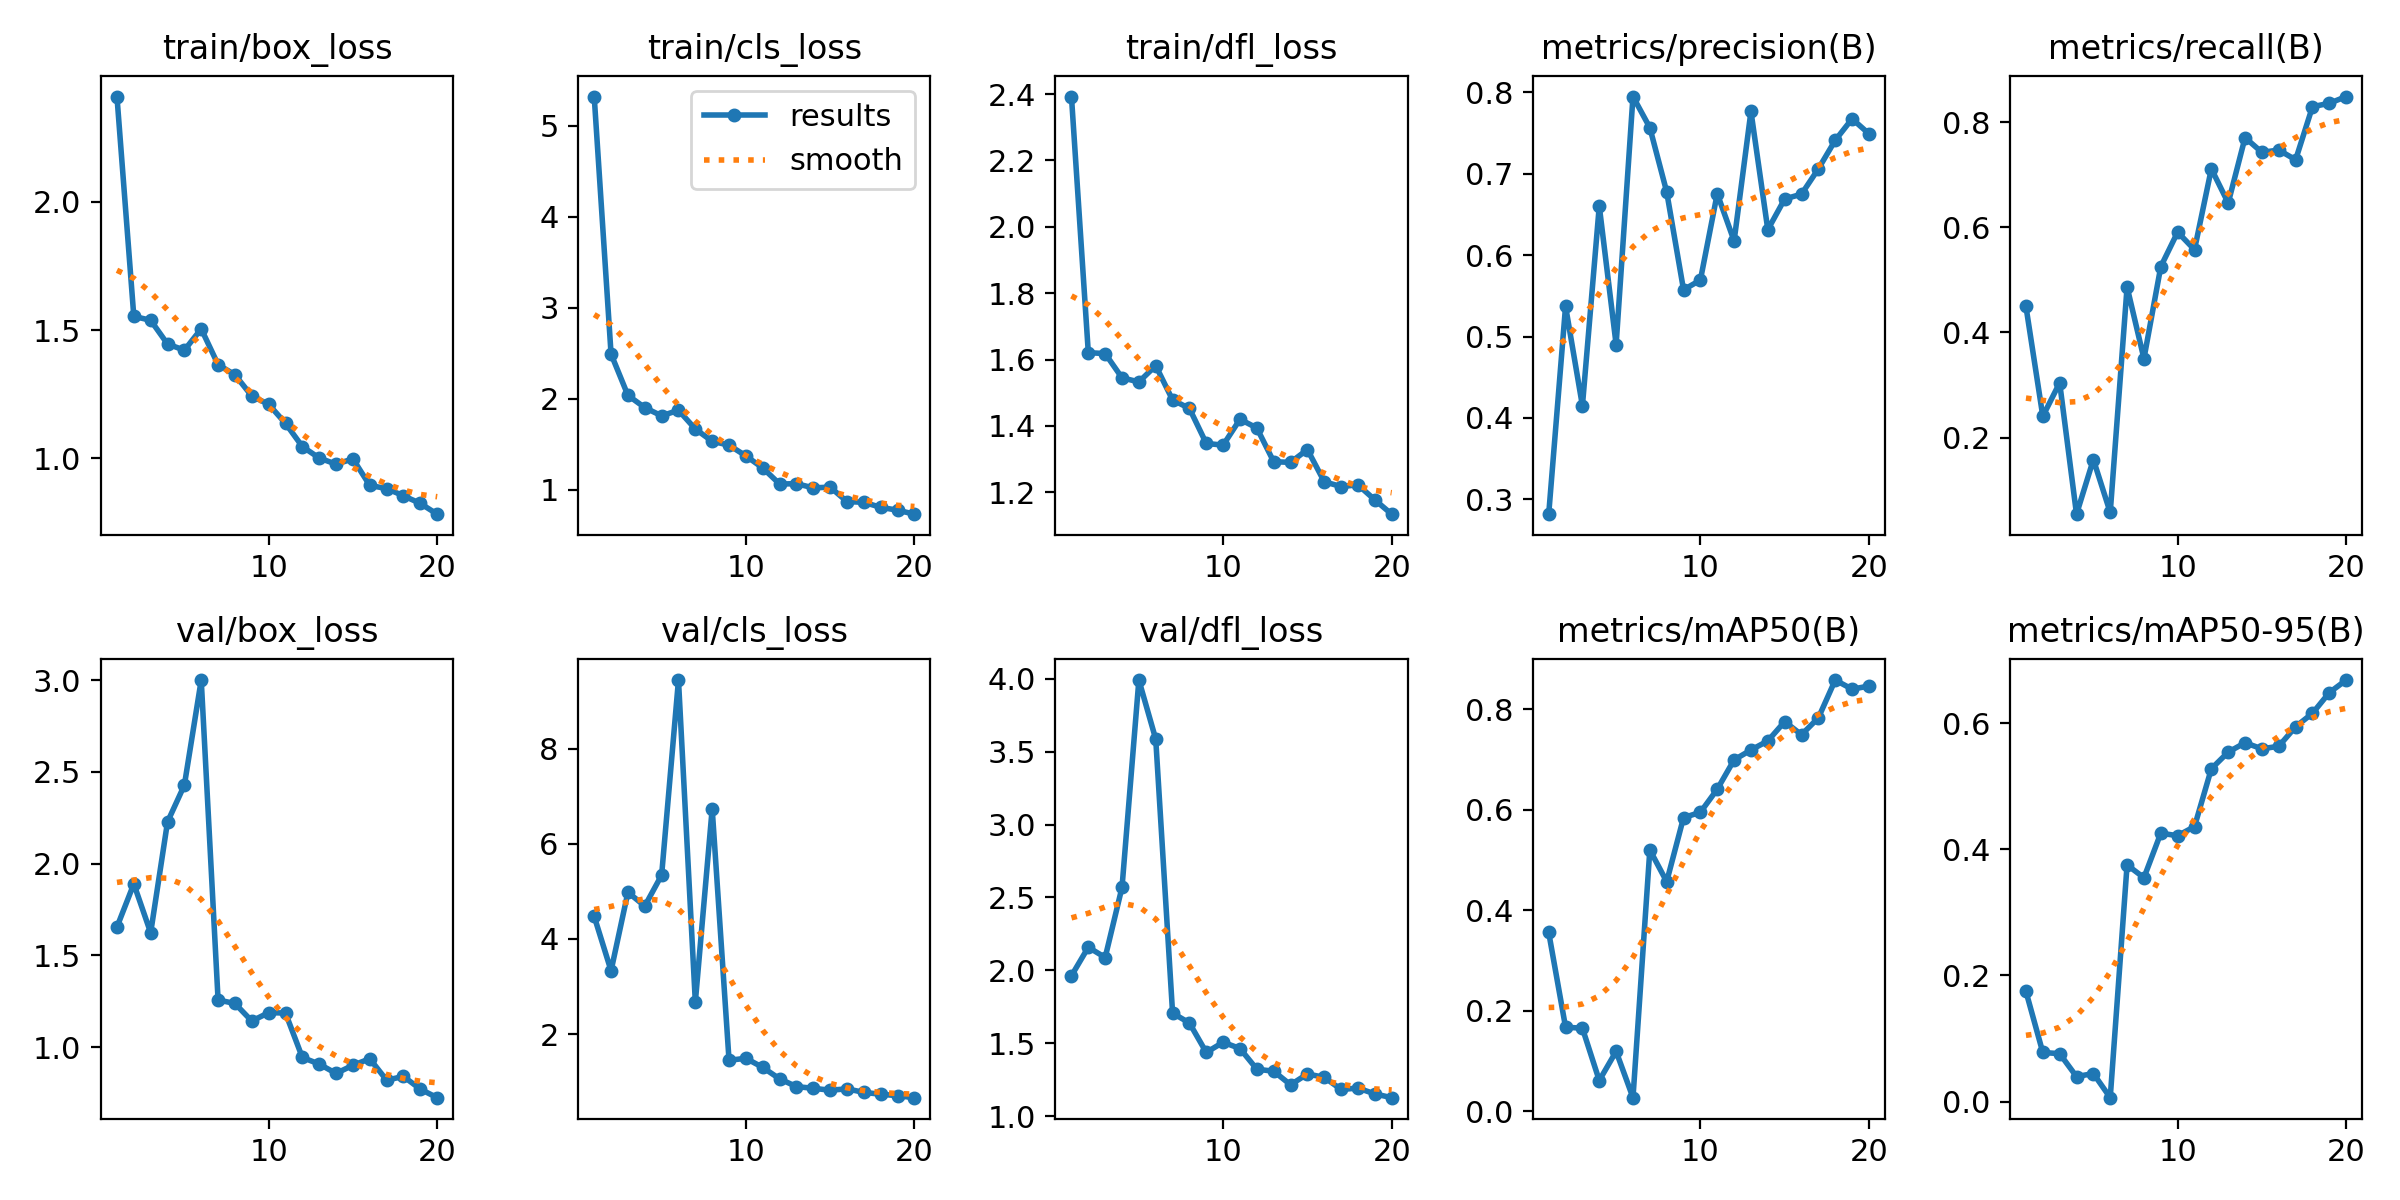

In [ ]:
# train 부분에 위에 학습 후 출력되는 Results saved to runs/detect/ 이후 train number에 따라 경로 수정
Image(filename=f'/content/runs/detect/train2/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data={'/content/'}/data.yaml

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/ewha_mi-1/valid/labels.cache... 121 images, 0 backgrounds, 0 corrupt: 100% 121/121 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:04<00:00,  1.63it/s]
                   all        121        121      0.749      0.849      0.846      0.667
                Middle        121         61      0.879      0.956      0.978      0.871
                  Pull        121         19      0.824      0.989      0.961      0.856
                  Push        121         14      0.485      0.674      0.595      0.337
                 Wrong        121         27      0.808      0.778      0.849      0.603
Speed: 3.1ms preprocess, 21.9ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https:/

In [ ]:
# train 부분에 위에 학습 후 출력되는 Results saved to runs/detect/ 이후 train number에 따라 경로 수정
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.5 source={'/content/ewha_mi-1/'}/test/images save_txt=true save_conf=true

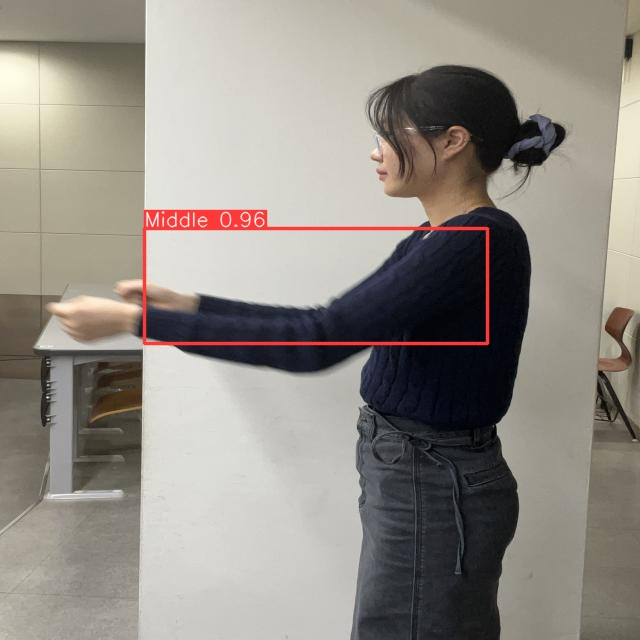

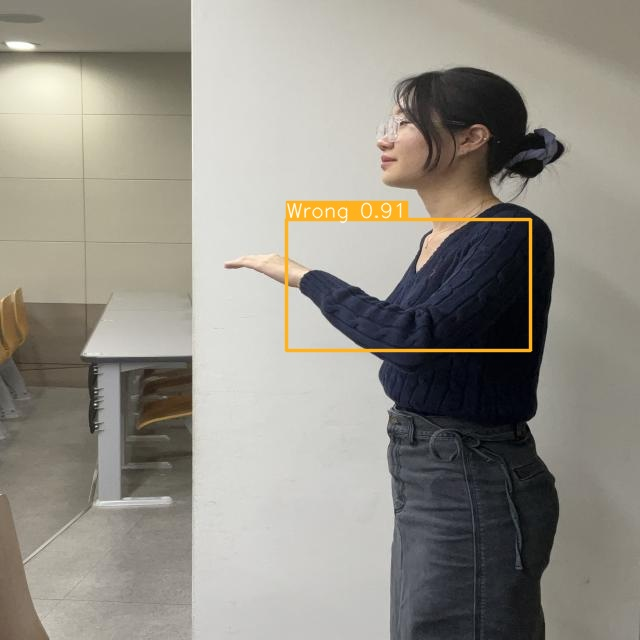

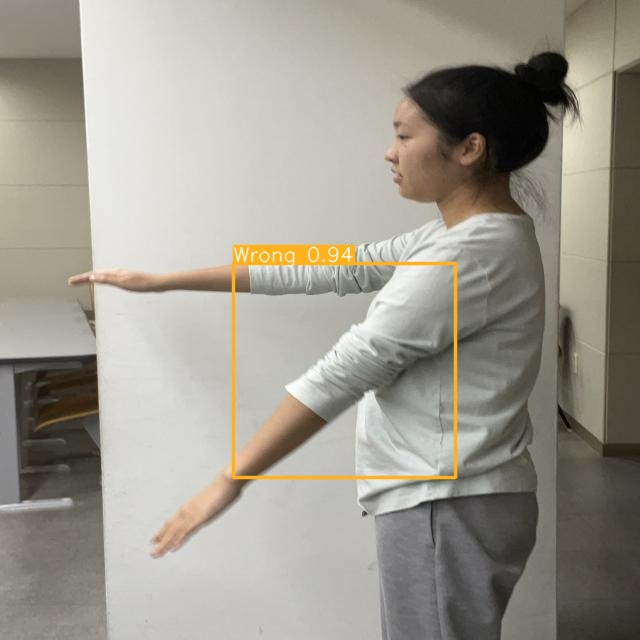

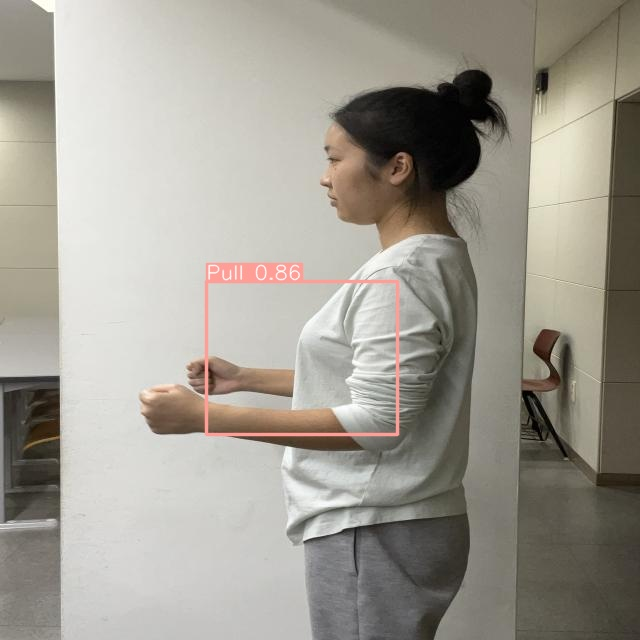

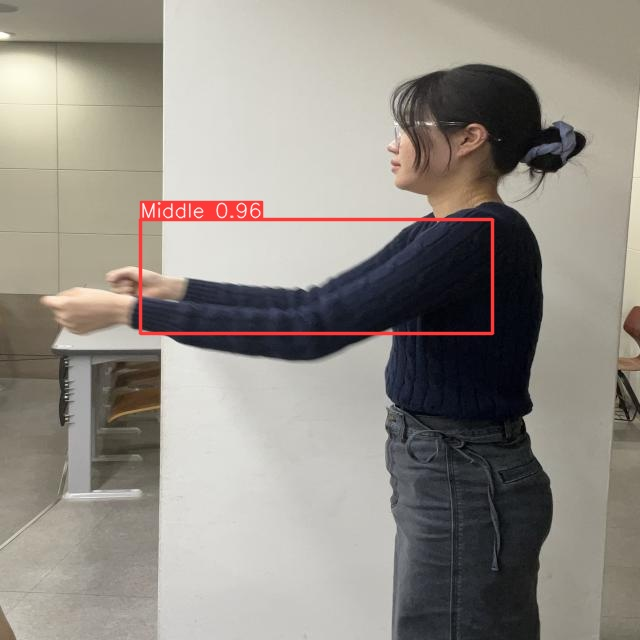

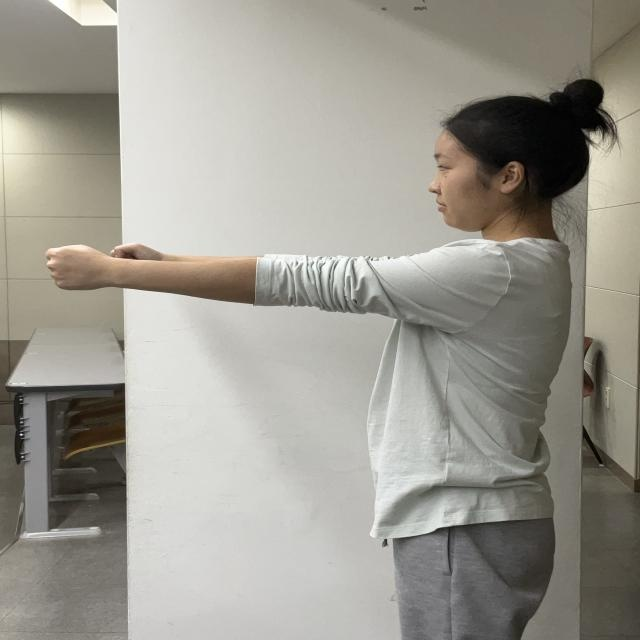

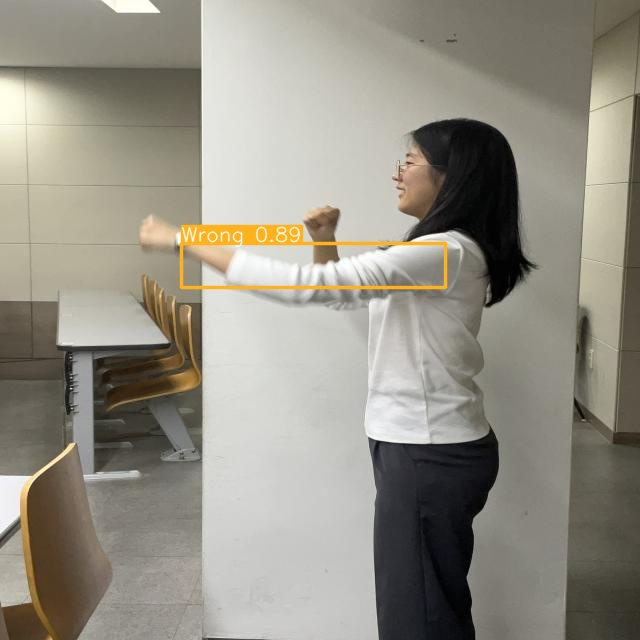

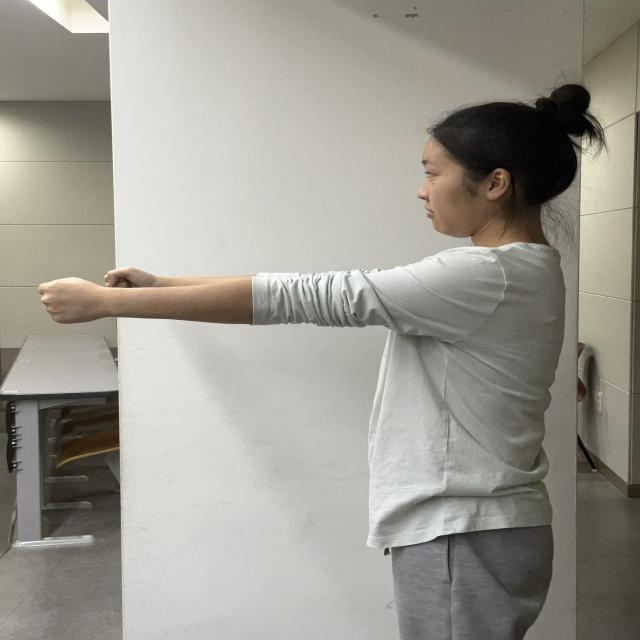

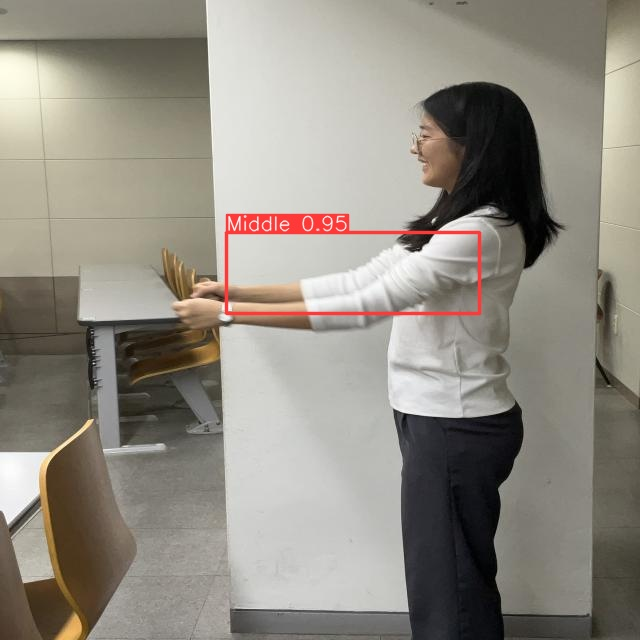

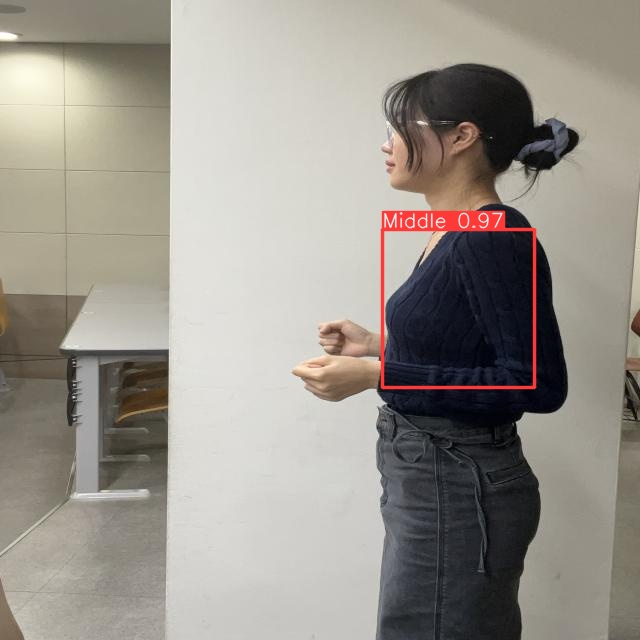

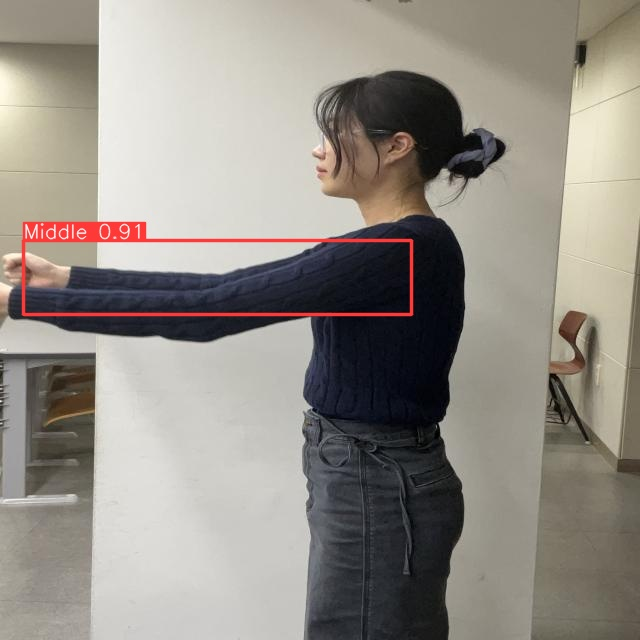

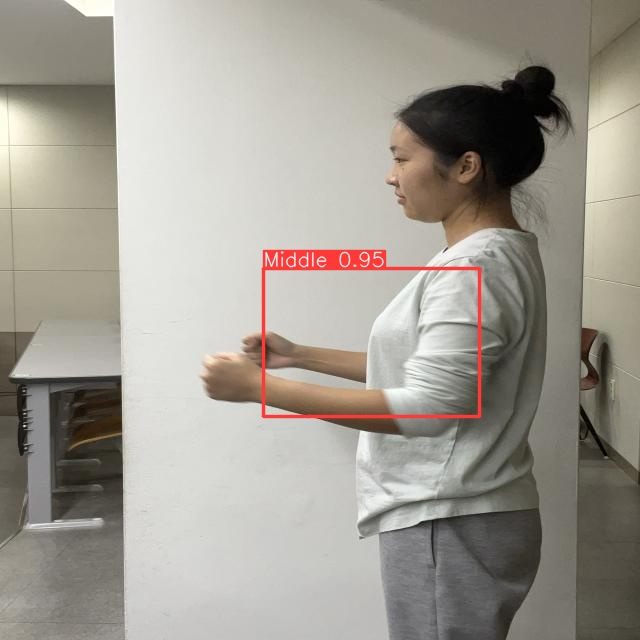

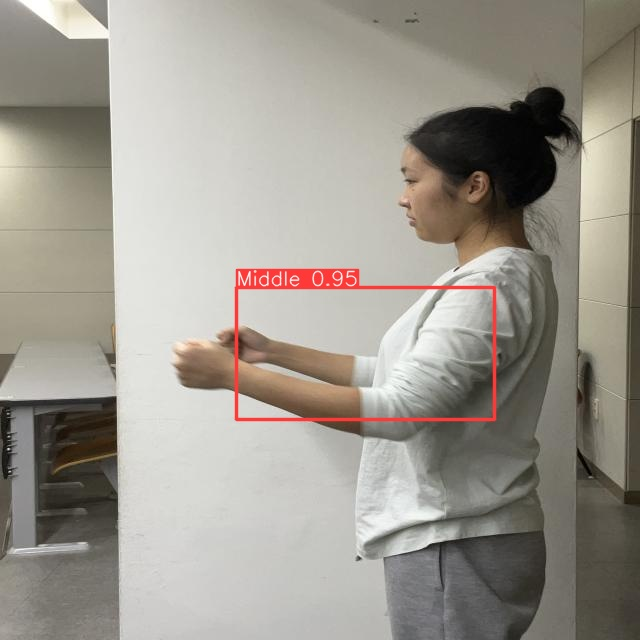

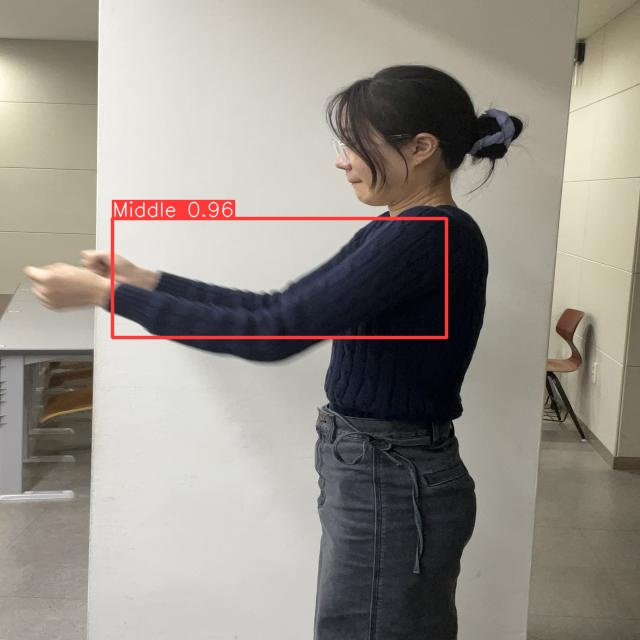

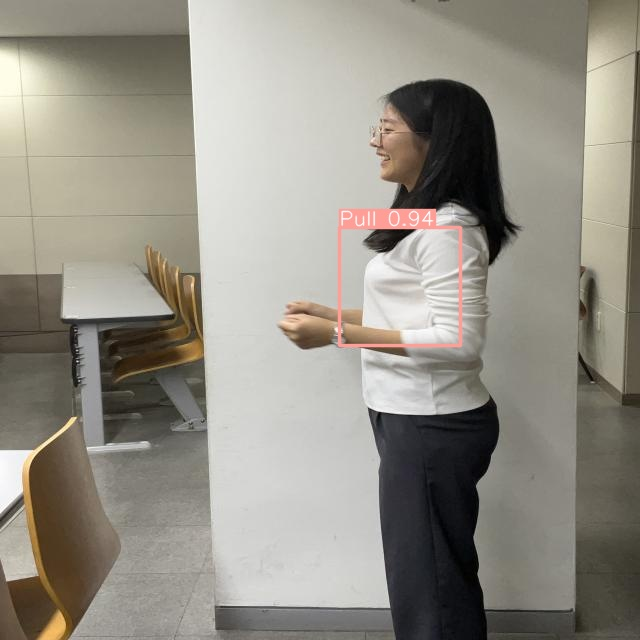

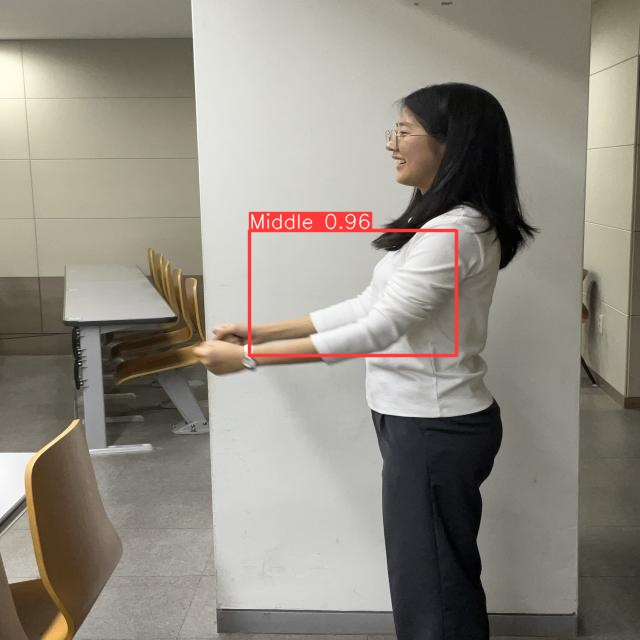

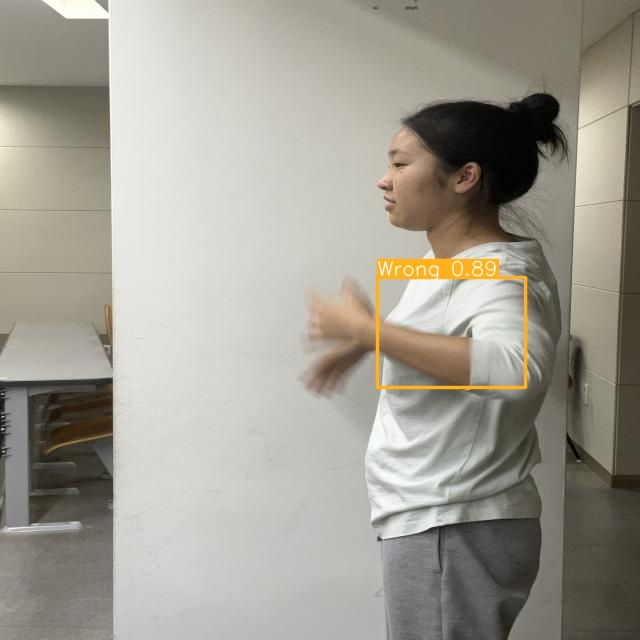

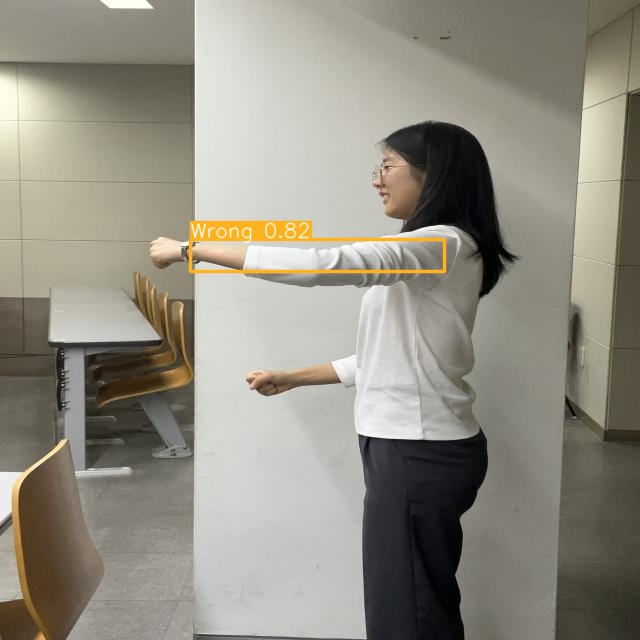

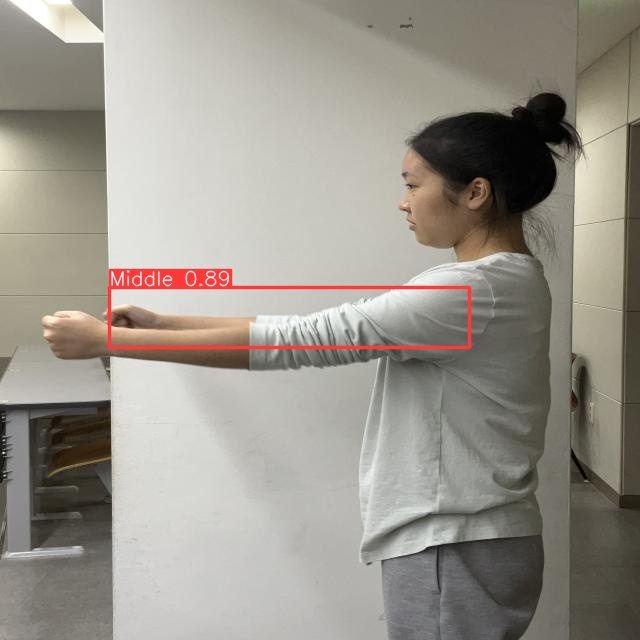

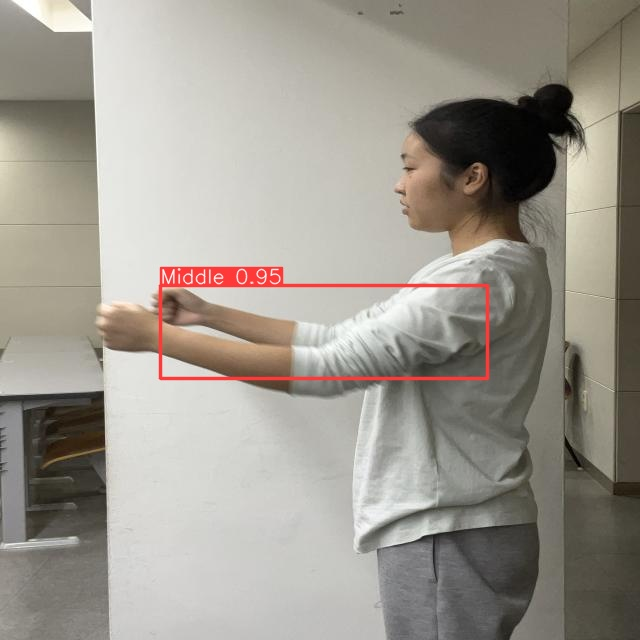

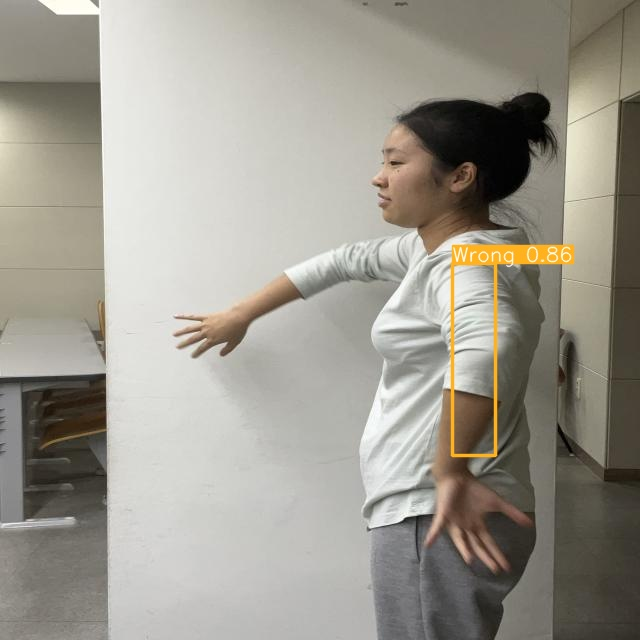

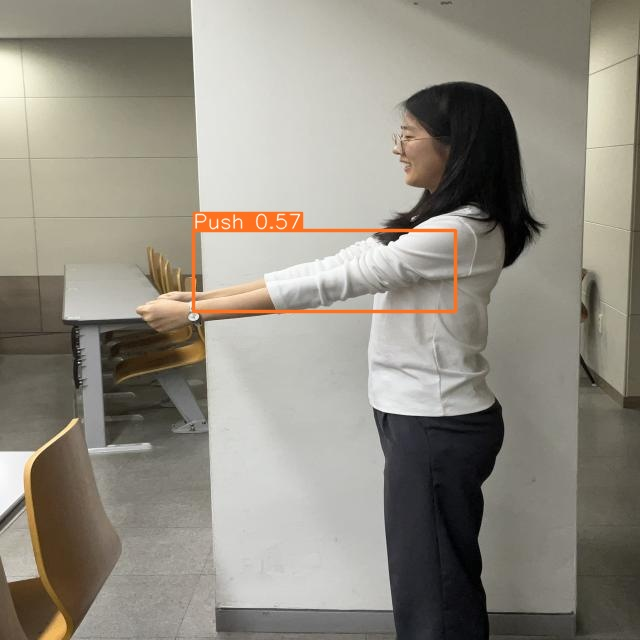

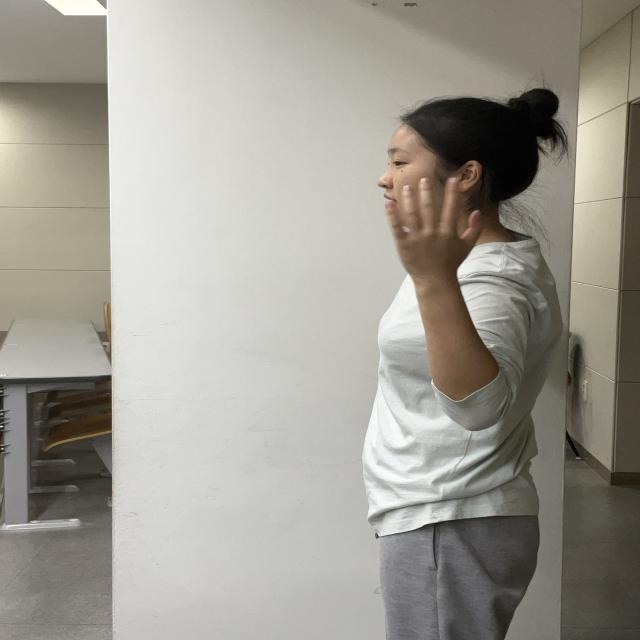

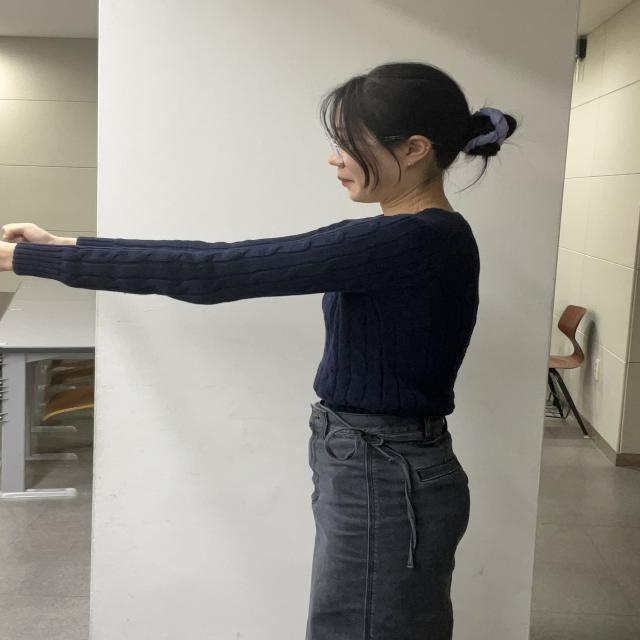

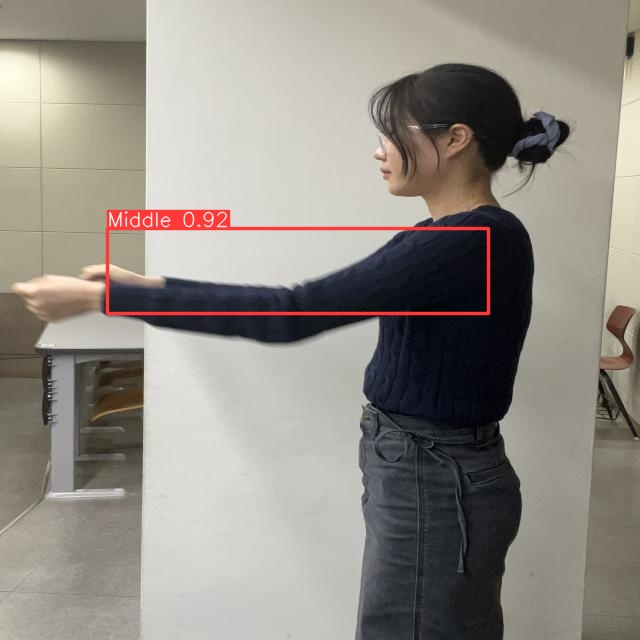

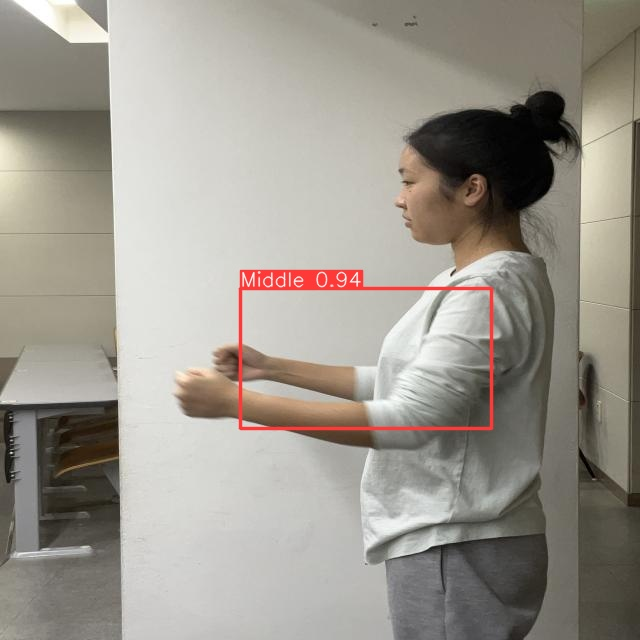

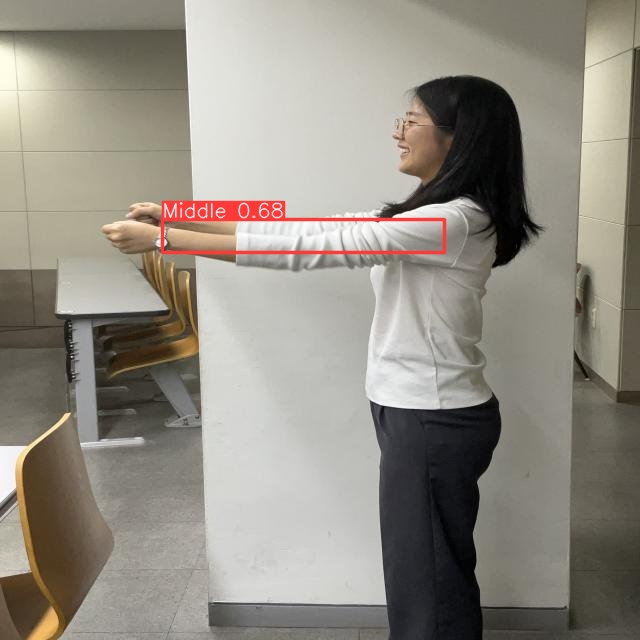

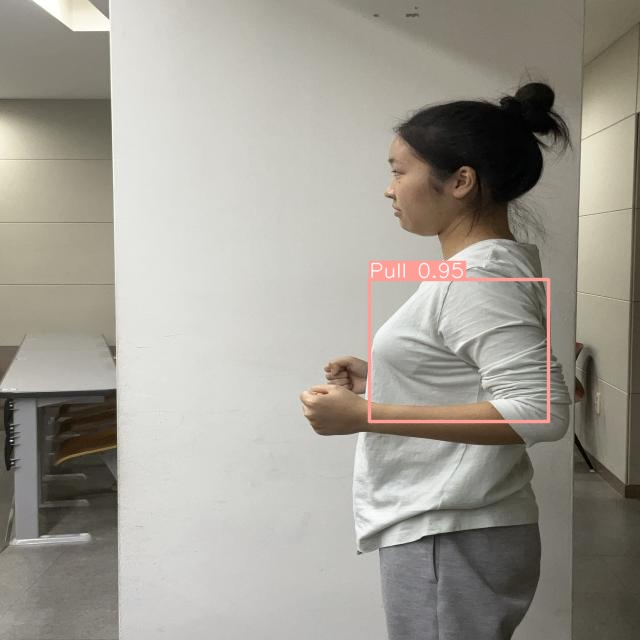

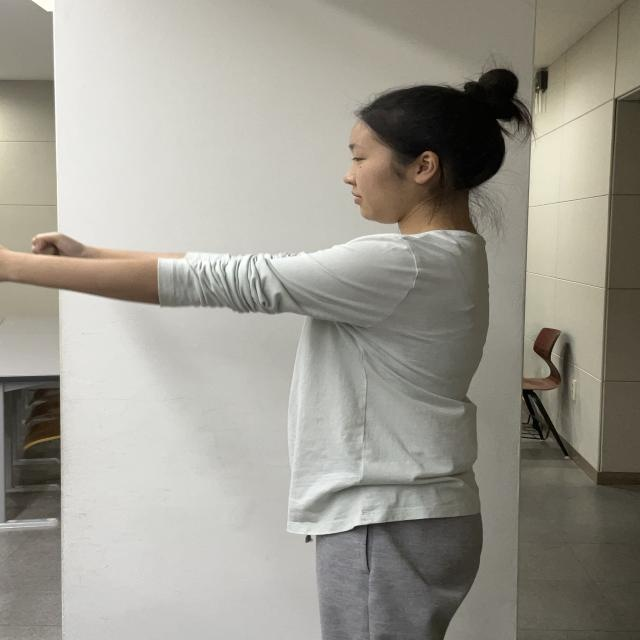

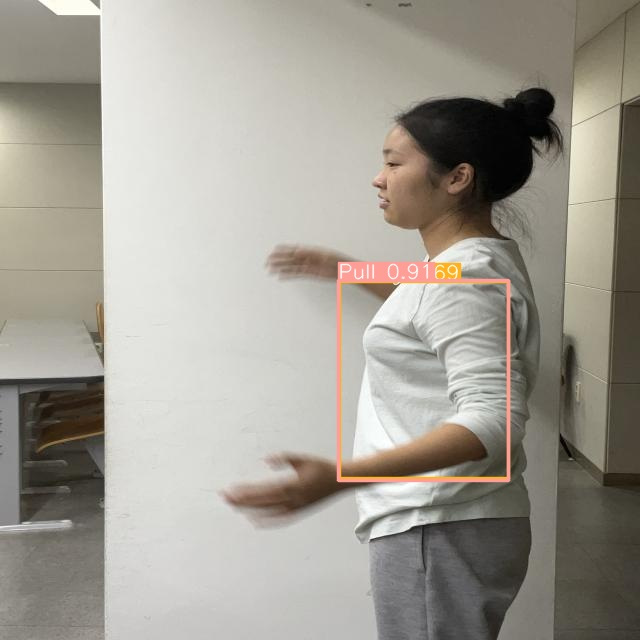

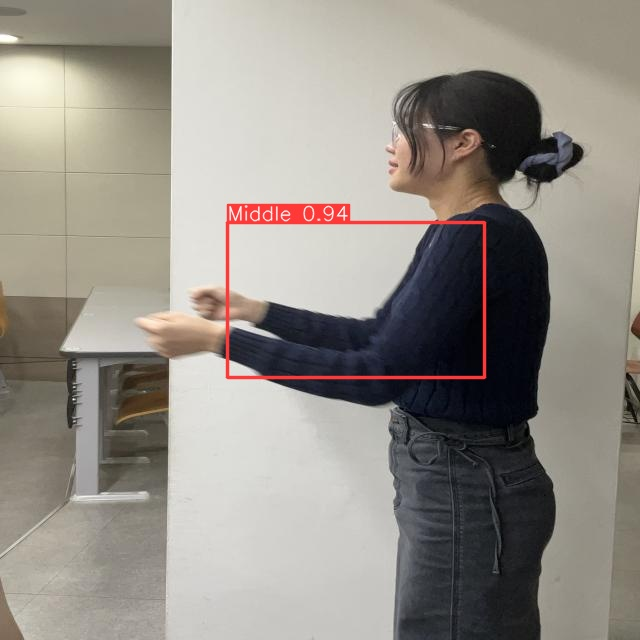

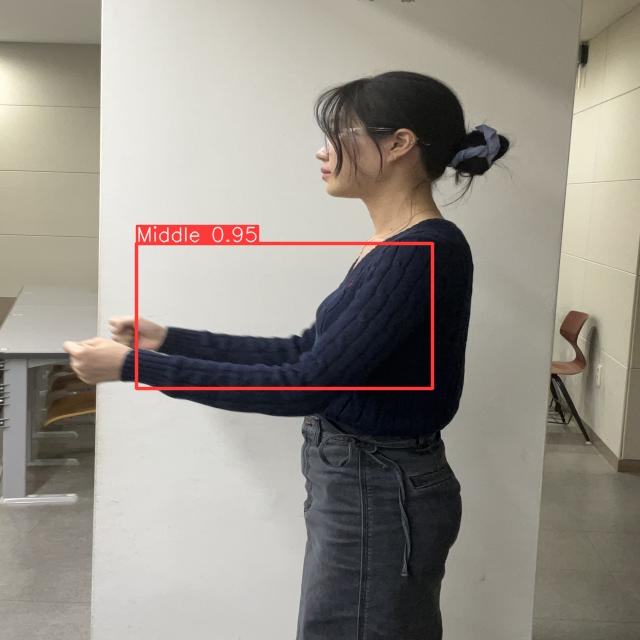

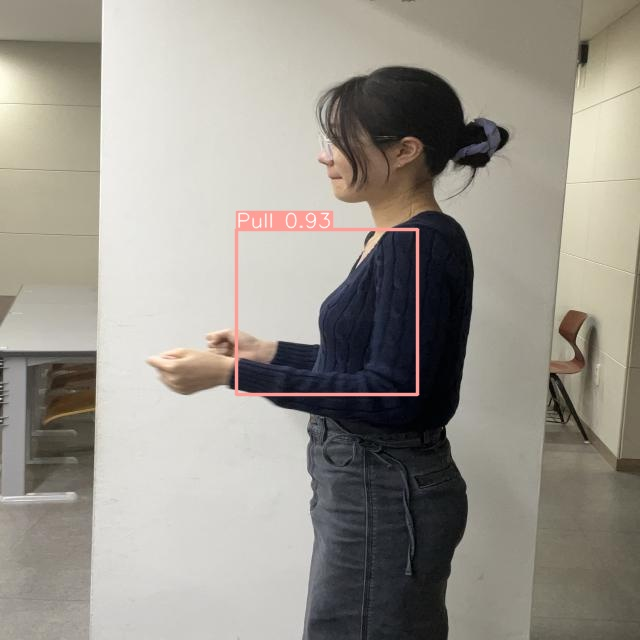

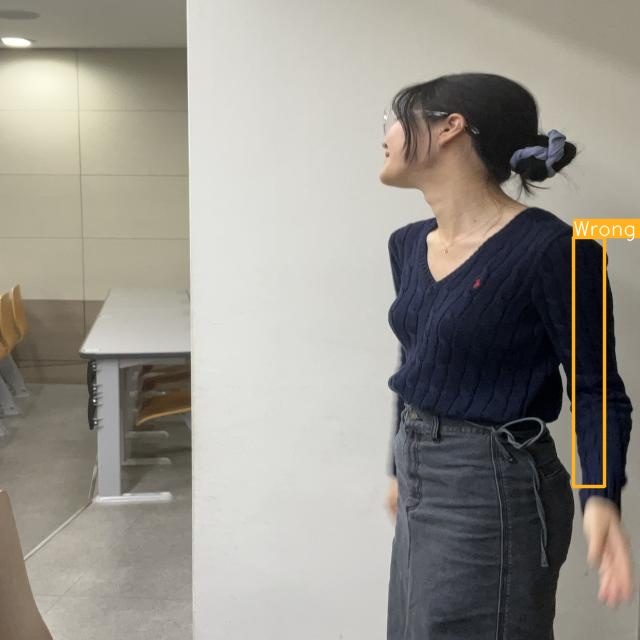

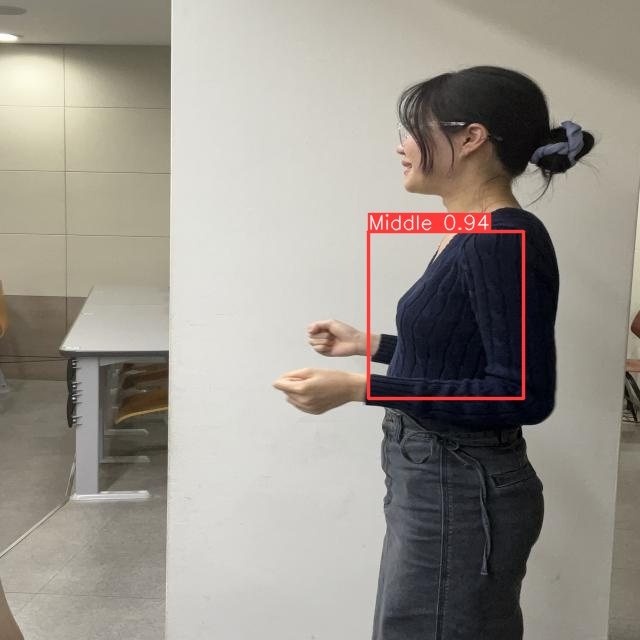

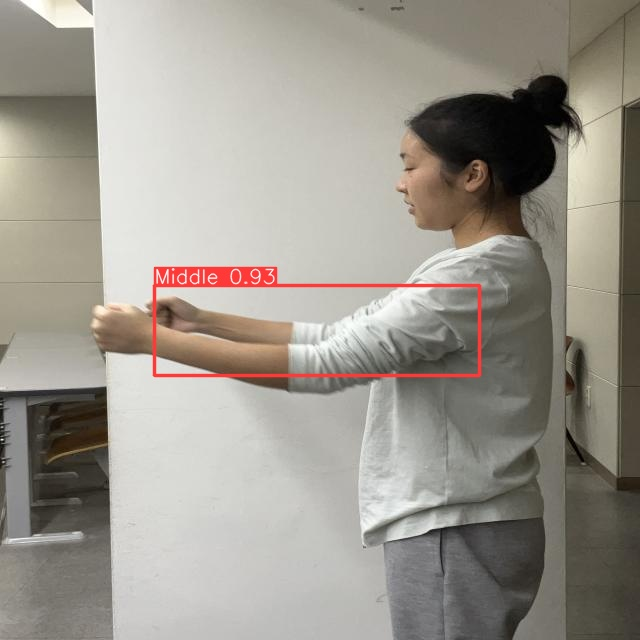

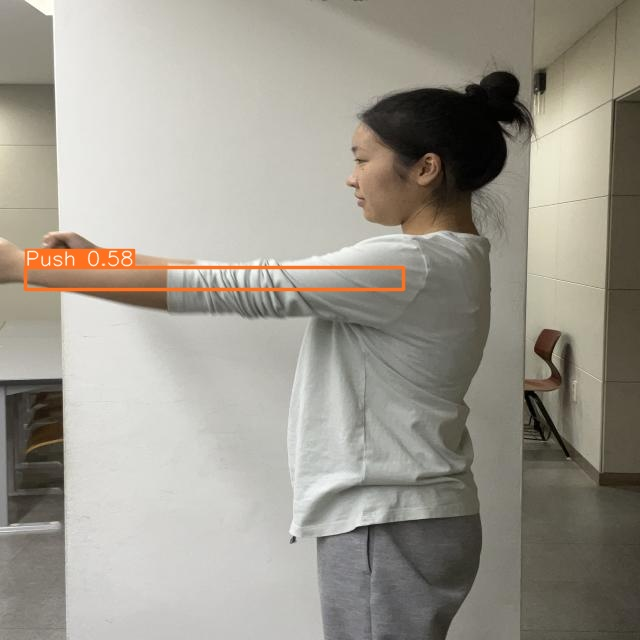

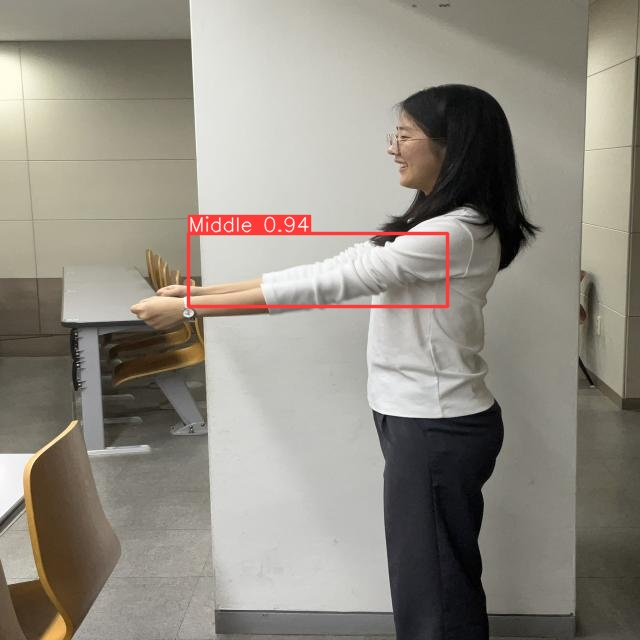

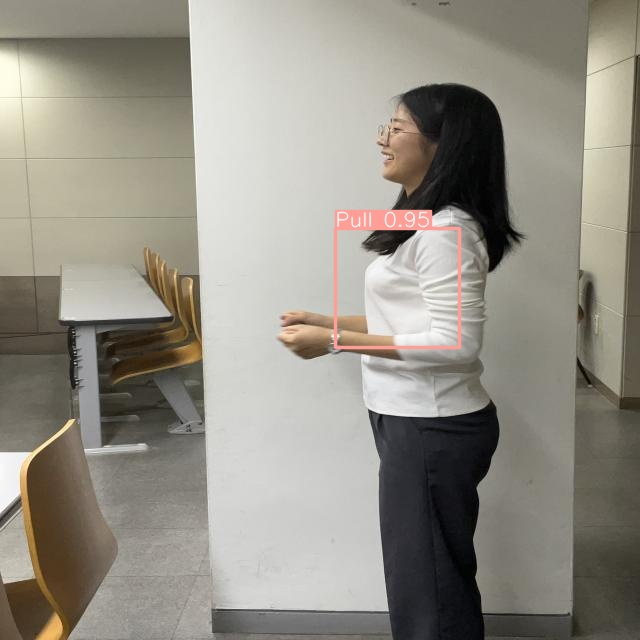

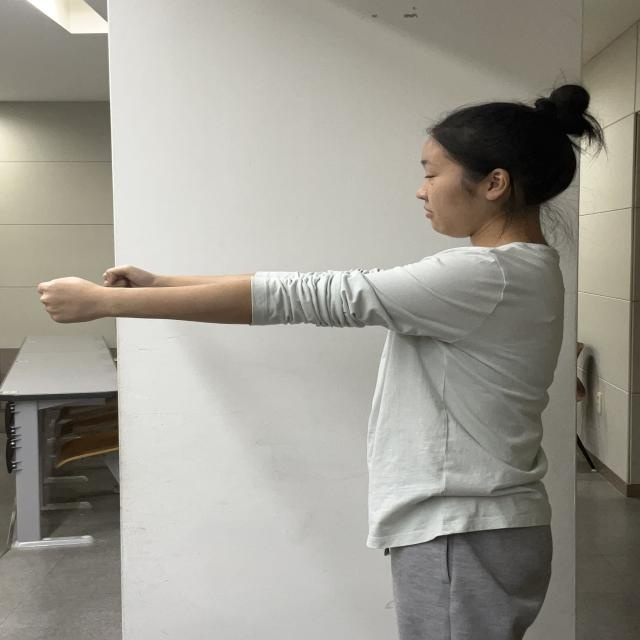

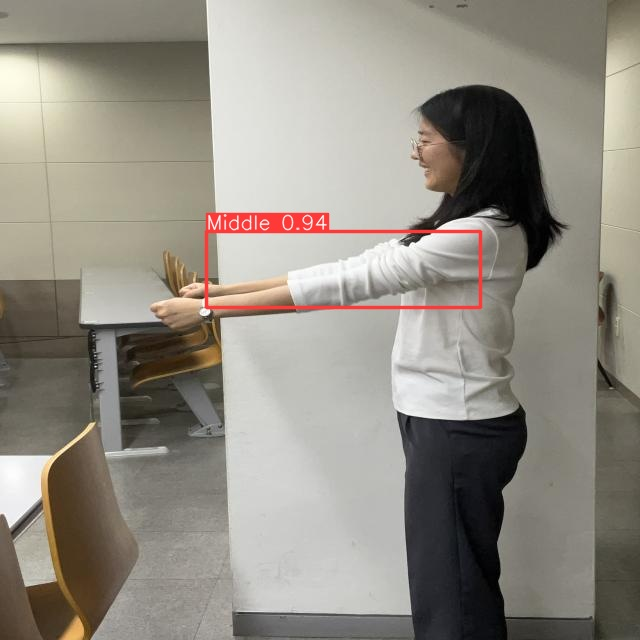

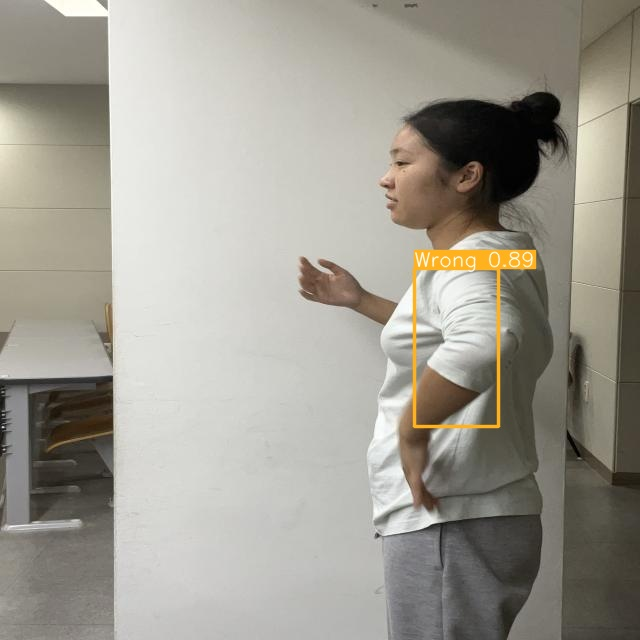

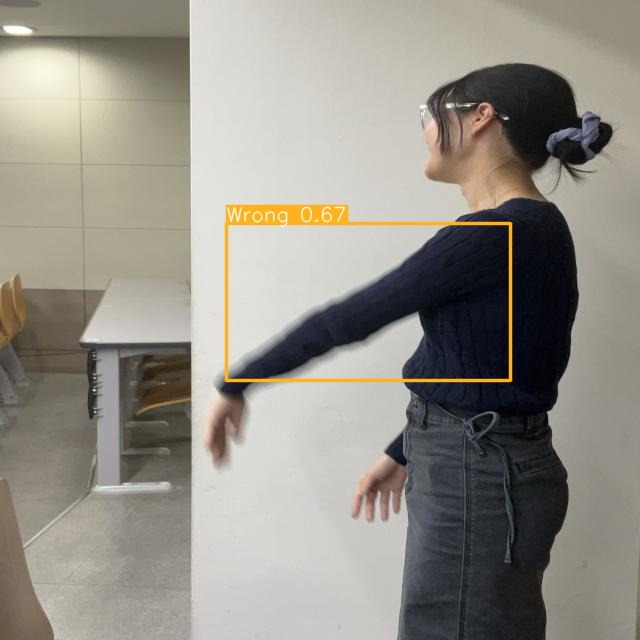

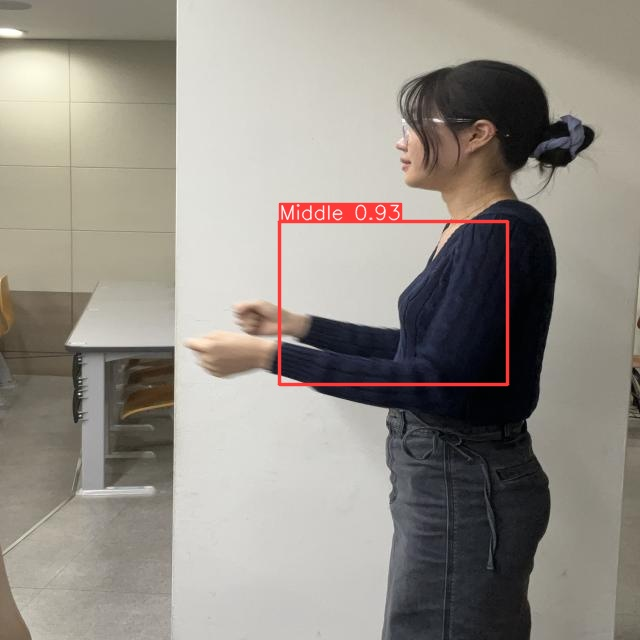

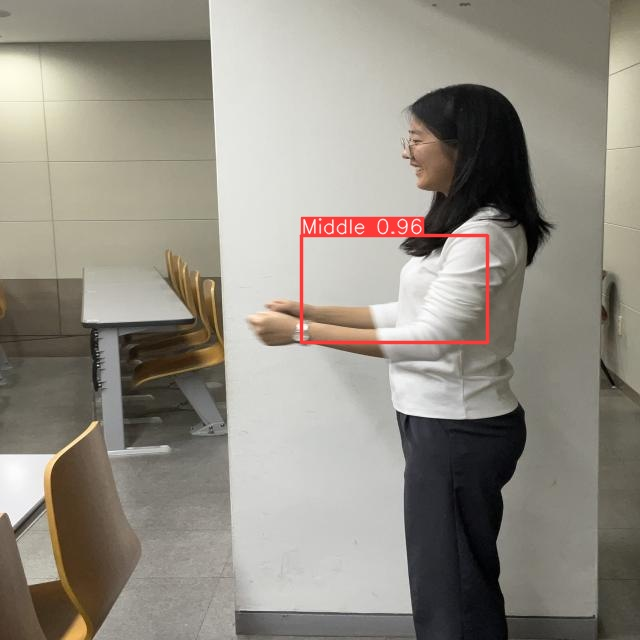

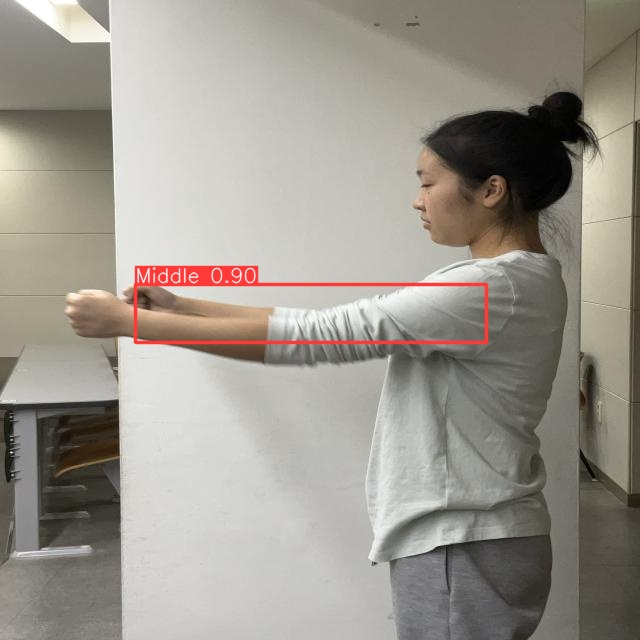

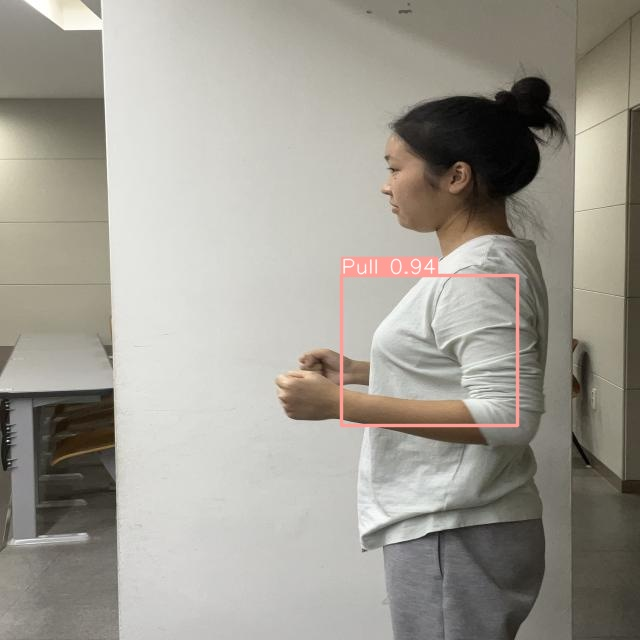

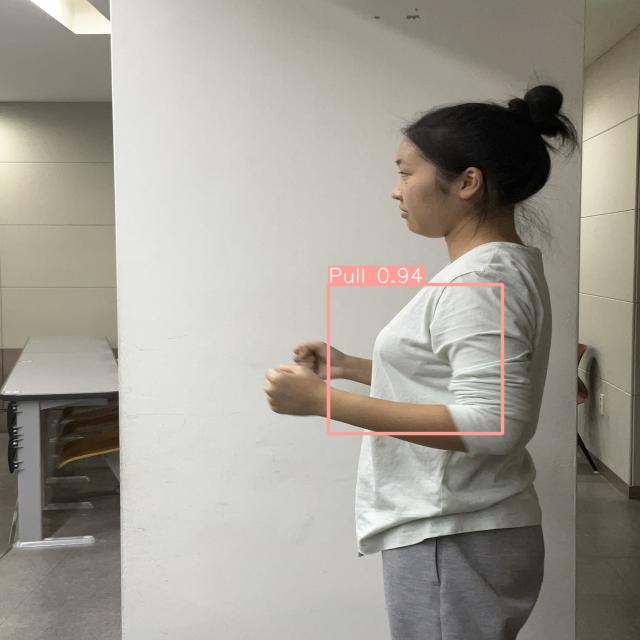

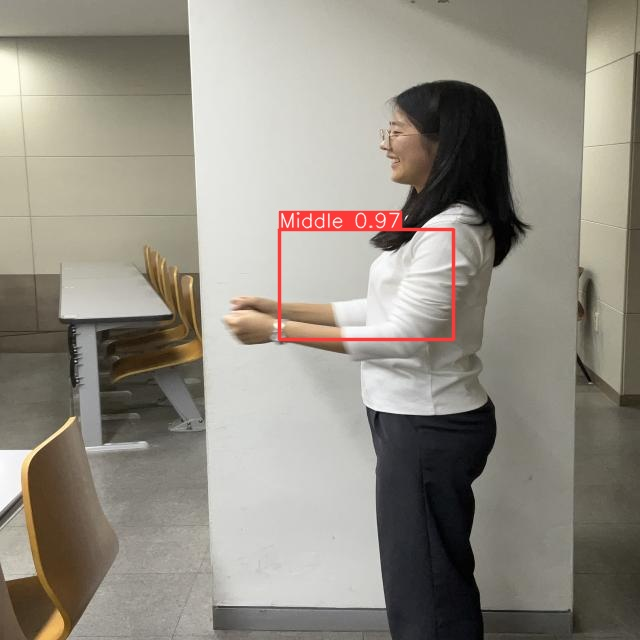

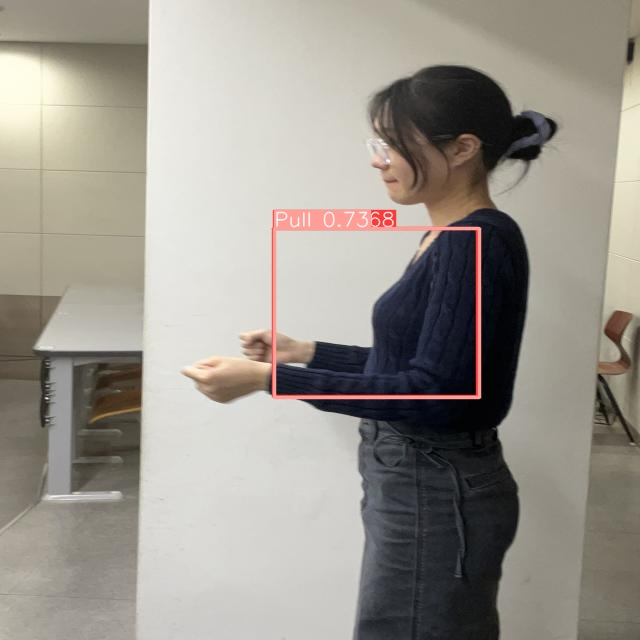

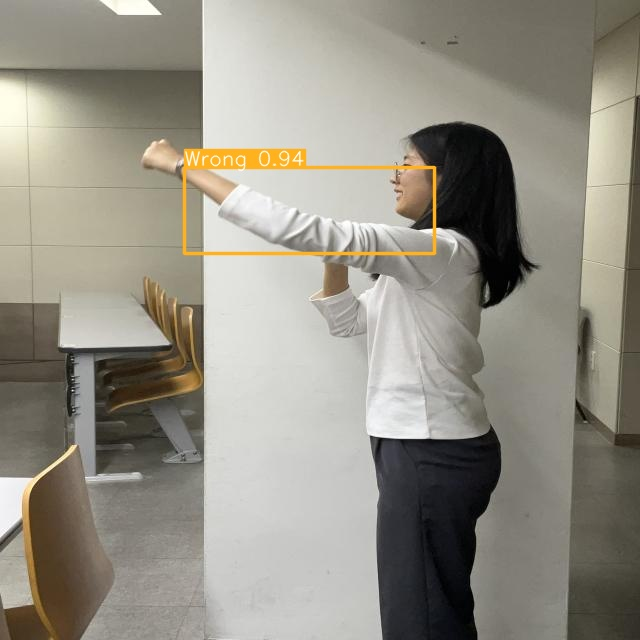

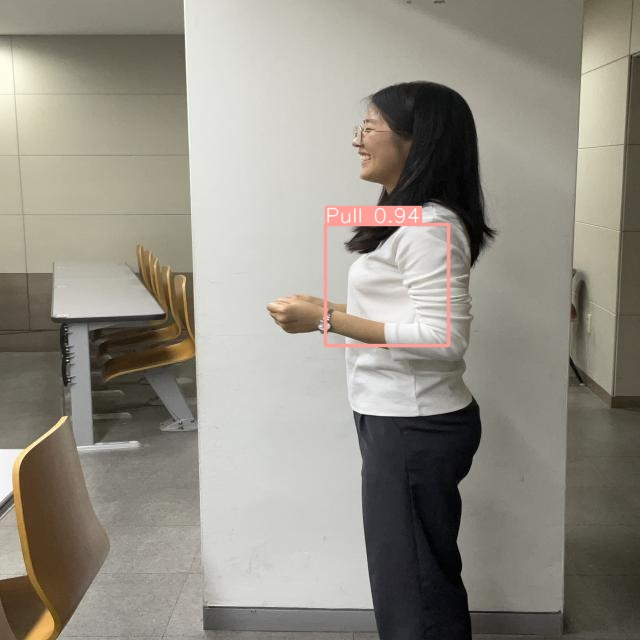

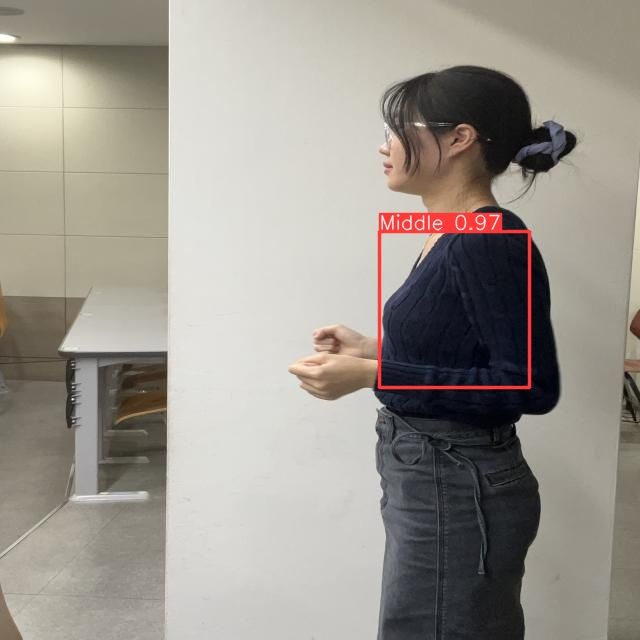

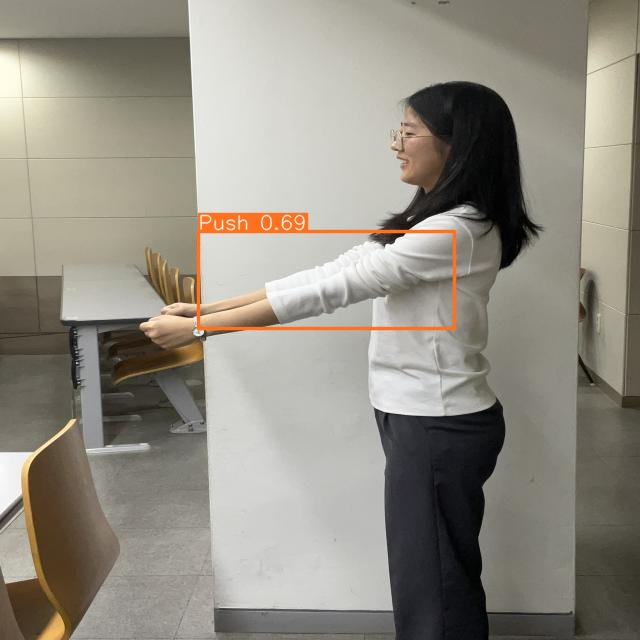

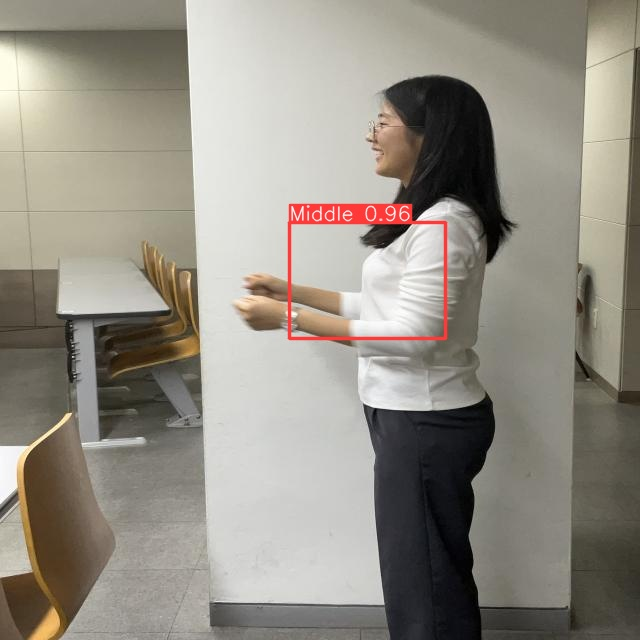

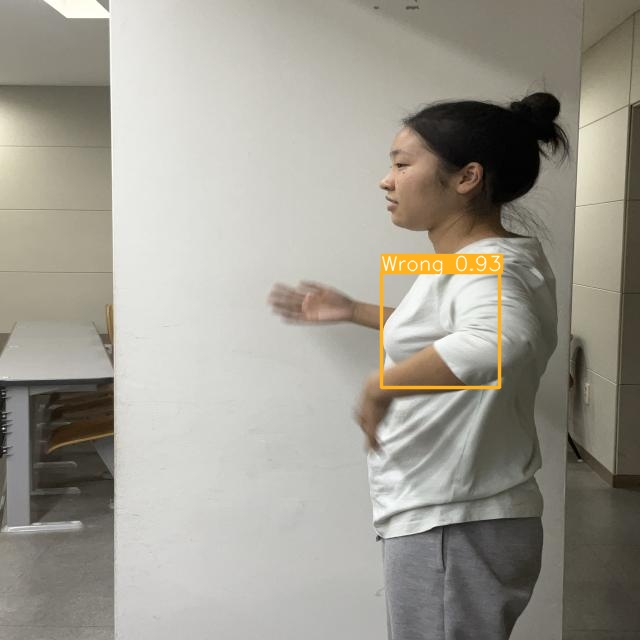

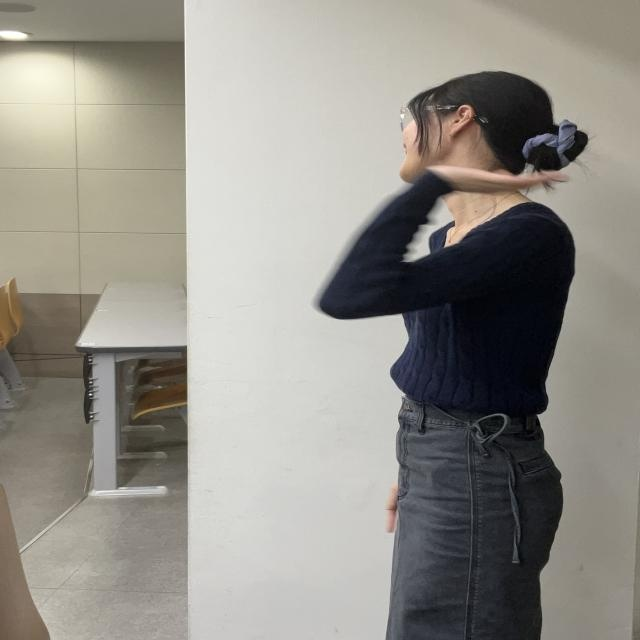

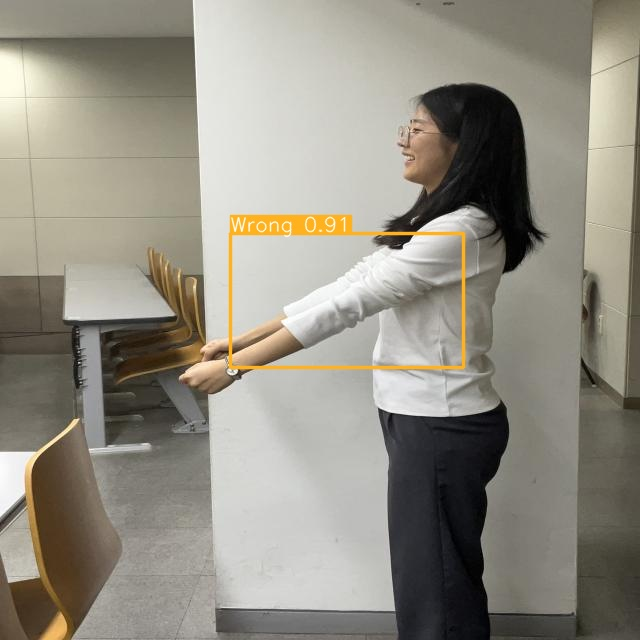

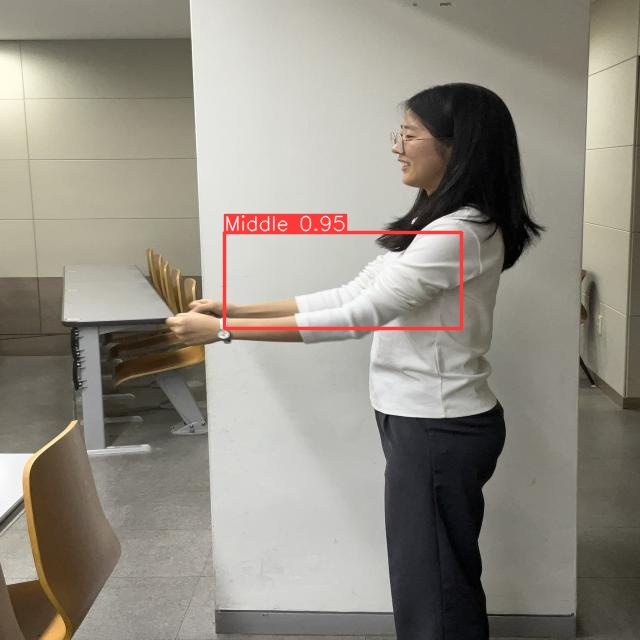

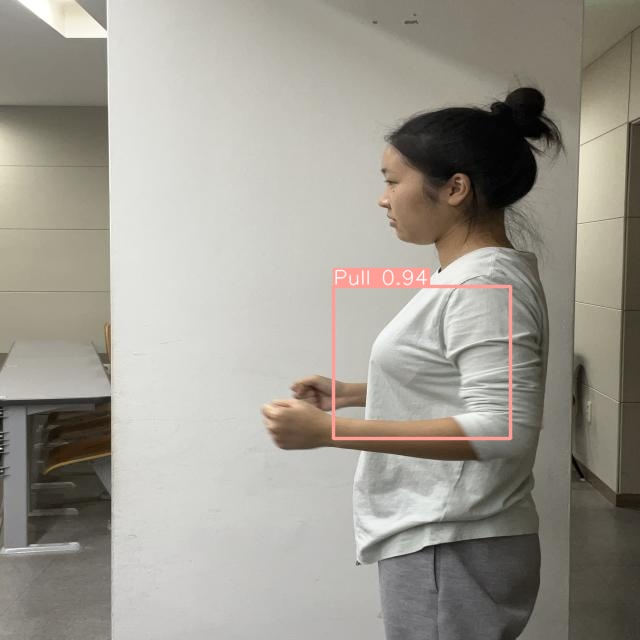

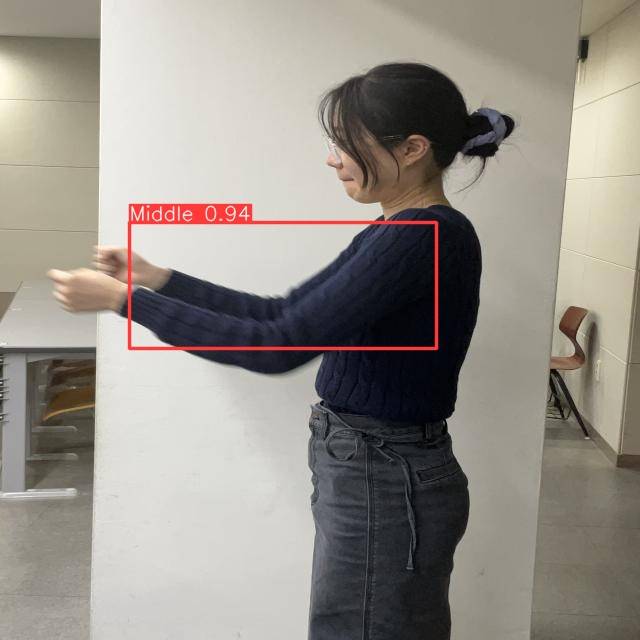

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")